# The 3-3-4-3-4 tiling
By which I mean

<img src="33434.png" width=40%>

This tiling is 2-regular according to Grünbaum and Shephard. From a cartographic perspective, it may be of interest, because it has 6 distinct tiles i.e. tiles distinguishable by shape and/orientation that can be separately symbolised. This property is related to the notion of transitivity groups in tilings. 

If the base-to-base triangles are merged then an alternate version with squares and rhombuses is available with 4 distinct tile types.

In [1]:
%matplotlib inline

import matplotlib.pyplot as pyplot

from shapely.geometry import Polygon
from shapely.affinity import rotate
from shapely.affinity import translate
from shapely.affinity import scale

from tile_map import Tiling
from tile_units import TileUnit

import numpy as np
import geopandas as gpd
import copy

ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

## Two versions
+ First, is a version where the paired triangles are merged.
+ Second, where they are not.

In [2]:
d0 = 100

In [3]:
square = Polygon([(-d0, -d0), (d0, -d0), (d0, d0), (-d0, d0)])
square = rotate(square, -30, origin = "centroid")
bb = square.bounds
tile = Polygon([(bb[0], bb[1]), (bb[2], bb[1]), (bb[2], bb[3]), (bb[0], bb[3])])
v1 = [0, 1, 2, 3]
v2 = [1, 2, 3, 0]
v3 = [0, 1, 2, 3]
tris = [Polygon([tile.exterior.coords[c[0]],
                 square.exterior.coords[c[1]],
                 square.exterior.coords[c[2]]]) for c in zip(v1, v2, v3)]
base = gpd.GeoDataFrame(
    data = {"element_id": list("abcde")},
    geometry = gpd.GeoSeries([square] + tris), crs = 2193)

In [4]:
bb = base.unary_union.bounds
dx = bb[2] - bb[0]
dy = bb[3] - bb[1]
base1 = copy.copy(base)
base2 = base1.scale(-1, 1, origin = (0, 0)).translate(dx, 0)
base3 = base1.scale(-1, -1, origin = (0, 0)).translate(dx, dy)
base4 = base1.scale(1, -1, origin = (0, 0)).translate(0, dy)

<AxesSubplot:>

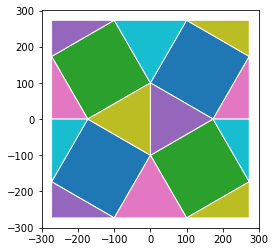

In [5]:
t1 = gpd.GeoDataFrame(
    data = {"element_id": list("acdefbcdef") * 2}, crs = 2193,
    geometry = gpd.GeoSeries(list(base1.geometry) + list(base2.geometry) + 
                             list(base3.geometry) + list(base4.geometry))
)
c = t1.unary_union.centroid
t2 = copy.copy(t1)
t2.element_id = list("acdefbedcfaefcdbcfed")

t1 = t1.dissolve(by = "element_id", as_index = False)
t1.geometry = t1.geometry.translate(-c.x, -c.y)
t2 = t2.dissolve(by = "element_id", as_index = False)
t2.geometry = t2.geometry.translate(-c.x, -c.y)

t2.plot(column = "element_id", edgecolor = "w")

In [6]:
unit = TileUnit(spacing = dx, crs = 2193)

<AxesSubplot:>

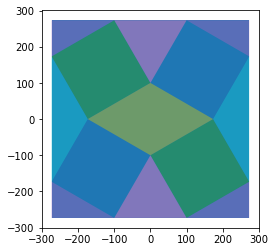

In [7]:
unit1 = copy.copy(unit)
unit1.elements = gpd.GeoDataFrame(
    data = t1.element_id, geometry = t1.geometry, crs = t1.crs
)
unit2 = copy.copy(unit1)
unit2.elements = gpd.GeoDataFrame(
    data = t2.element_id, geometry = t2.geometry, crs = t2.crs
)
ax = unit1.tile.plot()
unit1.elements.plot(ax = ax, column = "element_id", alpha = 0.5)

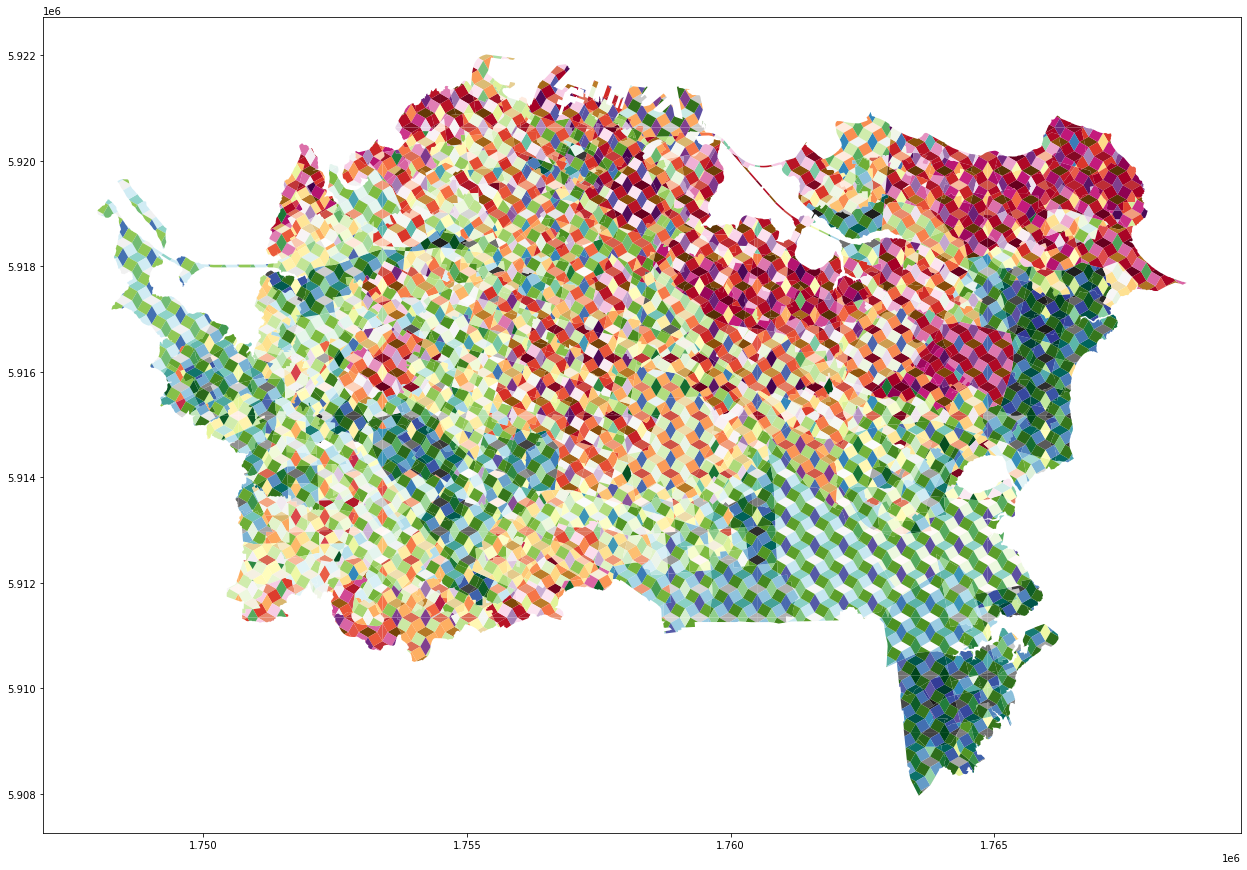

In [8]:
tiling1 = Tiling(unit1, ak, id_var = "DZ2018").get_tiled_map()

fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)
# ak.plot(ax = ax, facecolor = "#009966", linewidth = 0)

strands = set(tiling1.element_id)
cols = [x for x in tiling1.columns if "Rank" in x]
cmaps = ("BrBG", "RdGy", "RdYlBu", "Spectral", "PiYG", "PRGn", "PuOr")

for strand, col, cmap in zip(strands, cols, cmaps):
    tiling1[tiling1.element_id == strand].plot(
        ax = ax, column = col, cmap = cmap, k = 100, 
        scheme = "equal_interval", linewidth = 0)

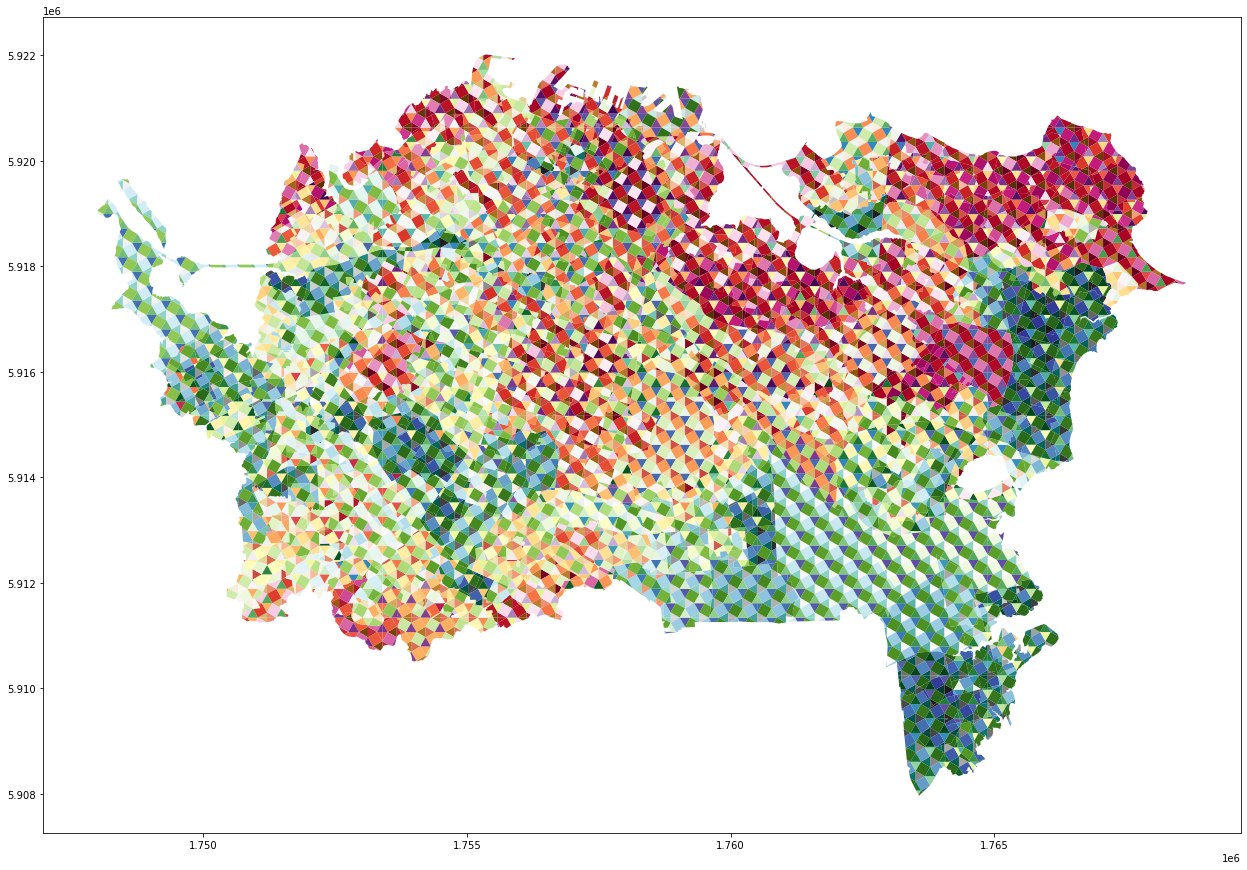

In [9]:
tiles2 = Tiling(unit2, ak, id_var = "DZ2018")
tiling2 = tiles2.get_tiled_map()

fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)
# ak.plot(ax = ax, facecolor = "#009966", linewidth = 0)

strands = set(tiling2.element_id)
cols = [x for x in tiling2.columns if "Rank" in x]
cmaps = ("BrBG", "RdGy", "RdYlBu", "Spectral", "PiYG", "PRGn", "PuOr")

for strand, col, cmap in zip(strands, cols, cmaps):
    tiling2[tiling2.element_id == strand].plot(
        ax = ax, column = col, cmap = cmap, k = 100, 
        scheme = "equal_interval", linewidth = 0)